# Model `Hyper` and `HyperPlus`

In [8]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

[I] Found settings.ini at d:\MEGA\PyBMF\examples\settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


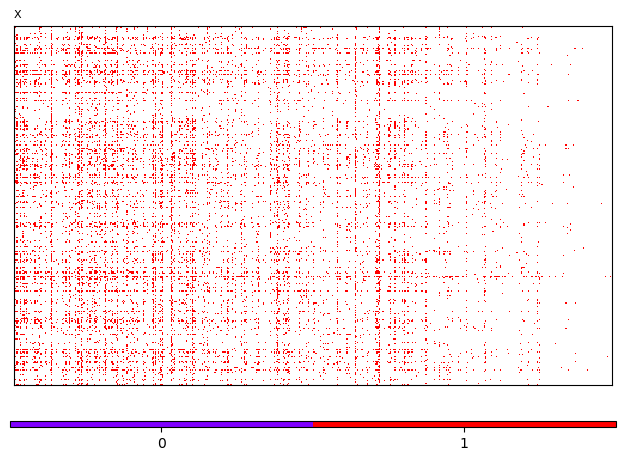

<Figure size 640x480 with 0 Axes>

In [10]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

In [11]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1721989519
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1721989519


# `Hyper` for exact decomposition

Since `Hyper` is an exact decomposition algorithm, there will be absolutely no coverage on validation and test set.

d:\MEGA\PyBMF\examples\..\PyBMF\models\Hyper.py:41: FutureWarning: Allowing arbitrary scalar fill_value in SparseDtype is deprecated. In a future version, the fill_value must be a valid value for the SparseDtype.subtype.
  X_df = pd.DataFrame.sparse.from_spmatrix(self.X_train.astype(bool))


[I] min_support  : 0.2
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] name         : 2024-07-26 18-29-48-491468 Hyper
[I] Found 496 itemsets, max size: 5


[I] Finding exact decomposition:  62%|██████▏   | 584/936 [00:51<00:30, 11.42it/s]


[I] time elapsed :  1m3s
[I] Found settings.ini at d:\MEGA\PyBMF\examples\settings.ini
[I] model saved as: 2024-07-26 18-29-48-491468 Hyper.pickle


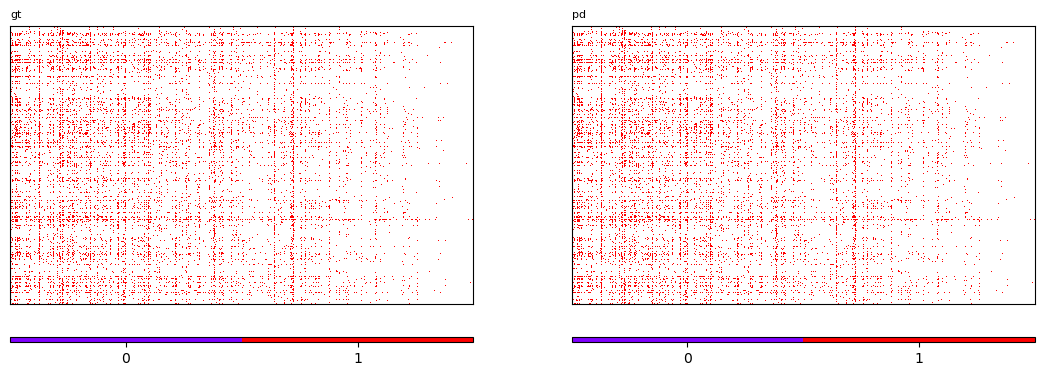

train                      \
                                                  0                       
                  time    k iter    shape    Recall Precision  Accuracy   
0    26/07/24 06:30:00    0    0  [69, 5]  0.032081       1.0  0.930607   
1    26/07/24 06:30:02    1  108  [19, 4]  0.039148       1.0  0.931113   
2    26/07/24 06:30:05    2  105  [65, 3]  0.057281       1.0  0.932413   
3    26/07/24 06:30:06    3   82  [60, 3]  0.074019       1.0  0.933613   
4    26/07/24 06:30:07    4   11  [10, 4]  0.077739       1.0  0.933880   
5    26/07/24 06:30:08    5   50  [62, 3]  0.091966       1.0  0.934900   
6    26/07/24 06:30:08    6    8  [10, 3]  0.094662       1.0  0.935093   
7    26/07/24 06:30:09    7   58  [68, 4]  0.108611       1.0  0.936093   
8    26/07/24 06:30:10    8   40  [61, 3]  0.120420       1.0  0.936940   
9    26/07/24 06:30:13    9  195  [61, 2]  0.131765       1.0  0.937753   
10   26/07/24 06:30:13   10    0  [60, 3]  0.143110       1.0  0.938567   
11   26/07/24 06:30:13   11   11  [49, 2]  0.152222       1.0  0.939220   
12   26/07/24 06:30:14   12    6  [25, 2]  0.156872       1.0  0.939553   
13   26/07/24 06:30:14   13    0  [24, 2]  0.161335       1.0  0.939873   
14   26/07/24 06:30:14   14    0  [23, 2]  0.165613       1.0  0.940180   
15   26/07/24 06:30:14   15    2  [21, 2]  0.169518       1.0  0.940460   
16   26/07/24 06:30:14   16    0  [20, 2]  0.173238       1.0  0.940727   
17   26/07/24 06:30:14   17   13   [4, 3]  0.174354       1.0  0.940807   
18   26/07/24 06:30:14   18   52   [6, 3]  0.175656       1.0  0.940900   
19   26/07/24 06:30:15   19   69   [4, 3]  0.176585       1.0  0.940967   
20   26/07/24 06:30:15   20   21  [60, 2]  0.184582       1.0  0.941540   
21   26/07/24 06:30:15   21   35  [31, 3]  0.188953       1.0  0.941853   
22   26/07/24 06:30:16   22   37  [31, 3]  0.193044       1.0  0.942147   
23   26/07/24 06:30:16   23    6  [61, 2]  0.200577       1.0  0.942687   
24   26/07/24 06:30:16   24    5  [25, 2]  0.203924       1.0  0.942927   
25   26/07/24 06:30:16   25    2  [60, 2]  0.211270       1.0  0.943453   
26   26/07/24 06:30:16   26   18  [60, 2]  0.218523       1.0  0.943973   
27   26/07/24 06:30:16   27    6  [23, 2]  0.221685       1.0  0.944200   
28   26/07/24 06:30:17   28   43  [16, 2]  0.223824       1.0  0.944353   
29   26/07/24 06:30:17   29    1   [6, 2]  0.224940       1.0  0.944433   
30   26/07/24 06:30:17   30    0  [25, 3]  0.226148       1.0  0.944520   
31   26/07/24 06:30:17   31   46   [4, 2]  0.226799       1.0  0.944567   
32   26/07/24 06:30:17   32   26   [5, 2]  0.227543       1.0  0.944620   
33   26/07/24 06:30:17   33    9  [19, 3]  0.229868       1.0  0.944787   
34   26/07/24 06:30:17   34   14  [79, 2]  0.238237       1.0  0.945387   
35   26/07/24 06:30:17   35   18  [23, 2]  0.240841       1.0  0.945573   
36   26/07/24 06:30:18   36   10  [10, 2]  0.242142       1.0  0.945667   
37   26/07/24 06:30:18   37    2  [20, 2]  0.244839       1.0  0.945860   
38   26/07/24 06:30:18   38    5   [7, 2]  0.246141       1.0  0.945953   
39   26/07/24 06:30:18   39   34  [15, 2]  0.247815       1.0  0.946073   
40   26/07/24 06:30:18   40    3  [60, 2]  0.253859       1.0  0.946507   
41   26/07/24 06:30:18   41   47  [65, 2]  0.260275       1.0  0.946967   
42   26/07/24 06:30:19   42   24  [69, 2]  0.266970       1.0  0.947447   
43   26/07/24 06:30:19   43    3  [25, 2]  0.269481       1.0  0.947627   
44   26/07/24 06:30:19   44    2   [4, 2]  0.270039       1.0  0.947667   
45   26/07/24 06:30:19   45    6  [61, 2]  0.275897       1.0  0.948087   
46   26/07/24 06:30:19   46    1  [61, 2]  0.281756       1.0  0.948507   
47   26/07/24 06:30:19   47    0  [11, 3]  0.282500       1.0  0.948560   
48   26/07/24 06:30:19   48   29   [5, 2]  0.283150       1.0  0.948607   
49   26/07/24 06:30:19   49    0  [15, 2]  0.284731       1.0  0.948720   
50   26/07/24 06:30:19   50   11  [63, 2]  0.290776       1.0  0.949153

<Figure size 640x480 with 0 Axes>

In [13]:
from PyBMF.models import Hyper
import warnings

min_support = 0.2

model = Hyper(min_support=min_support)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='reconstruction', verbose=False, display=False)

# `HyperPlus` for approximate decomposition

This

[I] model        : <PyBMF.models.Hyper.Hyper object at 0x000001EE5BB44580>
[I] beta         : inf
[I] target_k     : 200
[I] samples      : 10
[I] verbose      : False
[I] display      : False
[I] k from model : 585
[I] save_model   : False
[I] task         : reconstruction
[I] display      : True
[I]   save_model : False


[I] Sampling pairs... Current FP budget: 11.215: 100%|██████████| 1/1 [00:00<00:00, 999.60it/s]
[I] Sampling pairs... Current FP budget: 11.275: 0it [00:00, ?it/s]


[I] time elapsed :  4m1s


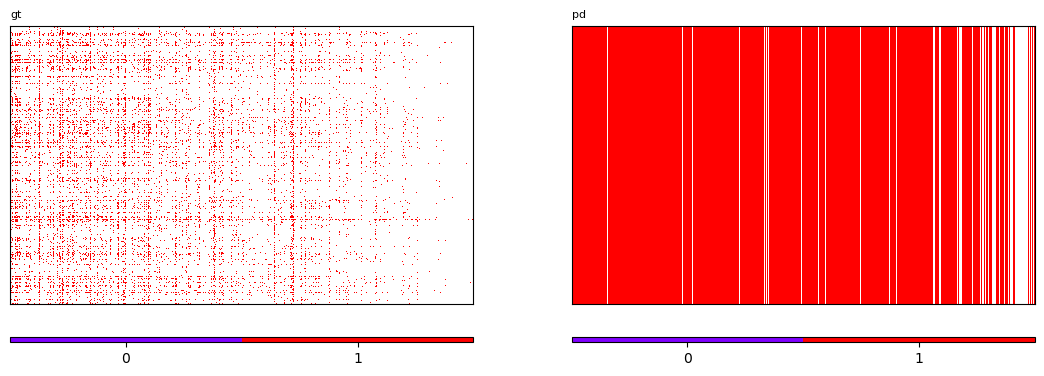

train                      \
                                                  0                       
                  time    k iter    shape    Recall Precision  Accuracy   
0    26/07/24 06:30:00    0    0  [69, 5]  0.032081       1.0  0.930607   
1    26/07/24 06:30:02    1  108  [19, 4]  0.039148       1.0  0.931113   
2    26/07/24 06:30:05    2  105  [65, 3]  0.057281       1.0  0.932413   
3    26/07/24 06:30:06    3   82  [60, 3]  0.074019       1.0  0.933613   
4    26/07/24 06:30:07    4   11  [10, 4]  0.077739       1.0  0.933880   
5    26/07/24 06:30:08    5   50  [62, 3]  0.091966       1.0  0.934900   
6    26/07/24 06:30:08    6    8  [10, 3]  0.094662       1.0  0.935093   
7    26/07/24 06:30:09    7   58  [68, 4]  0.108611       1.0  0.936093   
8    26/07/24 06:30:10    8   40  [61, 3]  0.120420       1.0  0.936940   
9    26/07/24 06:30:13    9  195  [61, 2]  0.131765       1.0  0.937753   
10   26/07/24 06:30:13   10    0  [60, 3]  0.143110       1.0  0.938567   
11   26/07/24 06:30:13   11   11  [49, 2]  0.152222       1.0  0.939220   
12   26/07/24 06:30:14   12    6  [25, 2]  0.156872       1.0  0.939553   
13   26/07/24 06:30:14   13    0  [24, 2]  0.161335       1.0  0.939873   
14   26/07/24 06:30:14   14    0  [23, 2]  0.165613       1.0  0.940180   
15   26/07/24 06:30:14   15    2  [21, 2]  0.169518       1.0  0.940460   
16   26/07/24 06:30:14   16    0  [20, 2]  0.173238       1.0  0.940727   
17   26/07/24 06:30:14   17   13   [4, 3]  0.174354       1.0  0.940807   
18   26/07/24 06:30:14   18   52   [6, 3]  0.175656       1.0  0.940900   
19   26/07/24 06:30:15   19   69   [4, 3]  0.176585       1.0  0.940967   
20   26/07/24 06:30:15   20   21  [60, 2]  0.184582       1.0  0.941540   
21   26/07/24 06:30:15   21   35  [31, 3]  0.188953       1.0  0.941853   
22   26/07/24 06:30:16   22   37  [31, 3]  0.193044       1.0  0.942147   
23   26/07/24 06:30:16   23    6  [61, 2]  0.200577       1.0  0.942687   
24   26/07/24 06:30:16   24    5  [25, 2]  0.203924       1.0  0.942927   
25   26/07/24 06:30:16   25    2  [60, 2]  0.211270       1.0  0.943453   
26   26/07/24 06:30:16   26   18  [60, 2]  0.218523       1.0  0.943973   
27   26/07/24 06:30:16   27    6  [23, 2]  0.221685       1.0  0.944200   
28   26/07/24 06:30:17   28   43  [16, 2]  0.223824       1.0  0.944353   
29   26/07/24 06:30:17   29    1   [6, 2]  0.224940       1.0  0.944433   
30   26/07/24 06:30:17   30    0  [25, 3]  0.226148       1.0  0.944520   
31   26/07/24 06:30:17   31   46   [4, 2]  0.226799       1.0  0.944567   
32   26/07/24 06:30:17   32   26   [5, 2]  0.227543       1.0  0.944620   
33   26/07/24 06:30:17   33    9  [19, 3]  0.229868       1.0  0.944787   
34   26/07/24 06:30:17   34   14  [79, 2]  0.238237       1.0  0.945387   
35   26/07/24 06:30:17   35   18  [23, 2]  0.240841       1.0  0.945573   
36   26/07/24 06:30:18   36   10  [10, 2]  0.242142       1.0  0.945667   
37   26/07/24 06:30:18   37    2  [20, 2]  0.244839       1.0  0.945860   
38   26/07/24 06:30:18   38    5   [7, 2]  0.246141       1.0  0.945953   
39   26/07/24 06:30:18   39   34  [15, 2]  0.247815       1.0  0.946073   
40   26/07/24 06:30:18   40    3  [60, 2]  0.253859       1.0  0.946507   
41   26/07/24 06:30:18   41   47  [65, 2]  0.260275       1.0  0.946967   
42   26/07/24 06:30:19   42   24  [69, 2]  0.266970       1.0  0.947447   
43   26/07/24 06:30:19   43    3  [25, 2]  0.269481       1.0  0.947627   
44   26/07/24 06:30:19   44    2   [4, 2]  0.270039       1.0  0.947667   
45   26/07/24 06:30:19   45    6  [61, 2]  0.275897       1.0  0.948087   
46   26/07/24 06:30:19   46    1  [61, 2]  0.281756       1.0  0.948507   
47   26/07/24 06:30:19   47    0  [11, 3]  0.282500       1.0  0.948560   
48   26/07/24 06:30:19   48   29   [5, 2]  0.283150       1.0  0.948607   
49   26/07/24 06:30:19   49    0  [15, 2]  0.284731       1.0  0.948720   
50   26/07/24 06:30:19   50   11  [63, 2]  0.290776       1.0  0.949153

train  \
                                                                        0   
                  time    k savings       FPR        FPB       OCR Recall   
0    26/07/24 06:31:09  584     inf  0.000208   0.002697  0.002689    1.0   
1    26/07/24 06:31:27  583     inf  0.000661   0.008555  0.008482    1.0   
2    26/07/24 06:31:53  584     inf  0.000136   0.001767  0.001764    1.0   
3    26/07/24 06:31:55  583     inf  0.000373   0.004835  0.004812    1.0   
4    26/07/24 06:31:57  582     inf  0.000725   0.009392  0.009304    1.0   
5    26/07/24 06:31:59  581     inf  0.000905   0.011717  0.011581    1.0   
6    26/07/24 06:32:00  580     inf  0.001451   0.018784  0.018437    1.0   
7    26/07/24 06:32:02  579     inf  0.001932   0.025014  0.024404    1.0   
8    26/07/24 06:32:04  578     inf  0.002406   0.031151  0.030210    1.0   
9    26/07/24 06:32:06  577     inf  0.002456   0.031802  0.030822    1.0   
10   26/07/24 06:32:08  576     inf  0.002506   0.032453  0.031433    1.0   
11   26/07/24 06:32:30  584     inf  0.000072   0.000930  0.000929    1.0   
12   26/07/24 06:32:30  583     inf  0.000675   0.008741  0.008665    1.0   
13   26/07/24 06:32:31  582     inf  0.001113   0.014413  0.014208    1.0   
14   26/07/24 06:32:31  581     inf  0.001487   0.019249  0.018885    1.0   
15   26/07/24 06:32:32  580     inf  0.001580   0.020458  0.020047    1.0   
16   26/07/24 06:32:32  579     inf  0.002004   0.025944  0.025288    1.0   
17   26/07/24 06:32:33  578     inf  0.002140   0.027711  0.026963    1.0   
18   26/07/24 06:32:33  577     inf  0.002334   0.030221  0.029335    1.0   
19   26/07/24 06:32:33  576     inf  0.003102   0.040171  0.038620    1.0   
20   26/07/24 06:32:34  575     inf  0.003181   0.041194  0.039564    1.0   
21   26/07/24 06:32:34  574     inf  0.003670   0.047517  0.045362    1.0   
22   26/07/24 06:32:35  573     inf  0.004165   0.053933  0.051173    1.0   
23   26/07/24 06:32:35  572     inf  0.004532   0.058676  0.055424    1.0   
24   26/07/24 06:32:36  571     inf  0.005006   0.064813  0.060868    1.0   
25   26/07/24 06:32:36  570     inf  0.005092   0.065929  0.061851    1.0   
26   26/07/24 06:32:37  569     inf  0.005257   0.068068  0.063730    1.0   
27   26/07/24 06:32:37  568     inf  0.005774   0.074763  0.069562    1.0   
28   26/07/24 06:32:38  567     inf  0.006212   0.080435  0.074447    1.0   
29   26/07/24 06:32:38  566     inf  0.006413   0.083039  0.076672    1.0   
30   26/07/24 06:32:38  565     inf  0.006822   0.088339  0.081169    1.0   
31   26/07/24 06:32:39  564     inf  0.007081   0.091687  0.083986    1.0   
32   26/07/24 06:32:39  563     inf  0.007275   0.094198  0.086088    1.0   
33   26/07/24 06:32:40  562     inf  0.007713   0.099870  0.090801    1.0   
34   26/07/24 06:32:40  561     inf  0.007806   0.101079  0.091800    1.0   
35   26/07/24 06:32:40  560     inf  0.007979   0.103310  0.093637    1.0   
36   26/07/24 06:32:41  559     inf  0.008266   0.107030  0.096682    1.0   
37   26/07/24 06:32:41  558     inf  0.008323   0.107774  0.097289    1.0   
38   26/07/24 06:32:42  557     inf  0.008898   0.115213  0.103310    1.0   
39   26/07/24 06:32:42  556     inf  0.009429   0.122094  0.108809    1.0   
40   26/07/24 06:32:43  555     inf  0.009968   0.129068  0.114314    1.0   
41   26/07/24 06:32:43  554     inf  0.010341   0.133904  0.118091    1.0   
42   26/07/24 06:32:44  553     inf  0.010772   0.139483  0.122409    1.0   
43   26/07/24 06:32:44  552     inf  0.011160   0.144504  0.126259    1.0   
44   26/07/24 06:32:45  551     inf  0.011548   0.149526  0.130076    1.0   
45   26/07/24 06:32:45  550     inf  0.011591   0.150084  0.130498    1.0   
46   26/07/24 06:32:45  549     inf  0.011842   0.153338  0.132952    1.0   
47   26/07/24 06:32:46  548     inf  0.012209   0.158081  0.136502    1.0   
48   26/07/24 06:32:46  547     inf  0.012754   0.165148  0.141740    1.0   
49   26/07/24 06:32:47  546     inf  0.013401   0.173517  0.1478

<Figure size 640x480 with 0 Axes>

In [16]:
from PyBMF.models import HyperPlus
import warnings

import numpy as np
beta = np.inf
samples = 10
target_k = 200

model_plus = HyperPlus(model=model, beta=beta, samples=samples, target_k=target_k)
model_plus.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='reconstruction', verbose=False, display=True, save_model=False)